# The Lorenz model

In [1]:
import logging

from functools import partial

import numpy as np
import scipy.stats as ss

import elfi
from elfi.examples.ma2 import autocov
from elfi.examples.lorenz import lorenz_ode, forecast_lorenz, cost_function, get_model

logging.basicConfig(level=logging.INFO)  # sometimes this is required to enable logging inside Jupyter

%matplotlib inline
%precision 2

# Set an arbitrary seed and a global random state to keep the randomly generated quantities the same between runs
seed = 20170530
np.random.seed(seed)

In [2]:
m = get_model()

In [3]:
res = m['Lorenz'].generate(1)

In [4]:
res

array([[[ 8.43e-01,  2.05e+00,  6.59e+00,  1.65e+00,  1.81e+00,
          3.61e+00,  3.82e+00, -8.13e-01,  5.23e-03,  1.15e+00,
          4.23e+00,  5.54e+00,  7.17e-01,  2.57e+00,  3.86e+00,
          8.09e-01, -4.40e-01,  1.93e+00,  3.95e+00,  3.52e+00,
         -1.09e+00, -3.31e-03,  1.36e+00,  5.30e+00,  1.67e+00,
         -1.57e+00,  2.43e+00,  5.92e+00,  2.26e+00, -9.43e-01,
          3.98e-01,  2.98e+00,  4.98e+00,  5.08e-01, -9.51e-01,
          2.79e-01,  2.73e+00,  5.51e+00,  8.24e-01, -1.85e+00],
        [ 7.39e-01,  1.81e+00,  6.54e+00,  1.57e+00,  1.84e+00,
          3.55e+00,  4.06e+00, -5.49e-01, -2.42e-01,  1.07e+00,
          4.07e+00,  5.60e+00,  8.43e-01,  2.48e+00,  3.87e+00,
          1.00e+00, -5.42e-01,  1.89e+00,  3.79e+00,  3.76e+00,
         -8.61e-01, -2.28e-01,  1.28e+00,  5.24e+00,  1.93e+00,
         -1.62e+00,  2.47e+00,  5.71e+00,  2.70e+00, -7.53e-01,
          2.73e-01,  2.83e+00,  4.98e+00,  9.06e-01, -1.04e+00,
          2.30e-01,  2.60e+00,  5.53e+0

In [5]:
# m['d'].generate(1000)

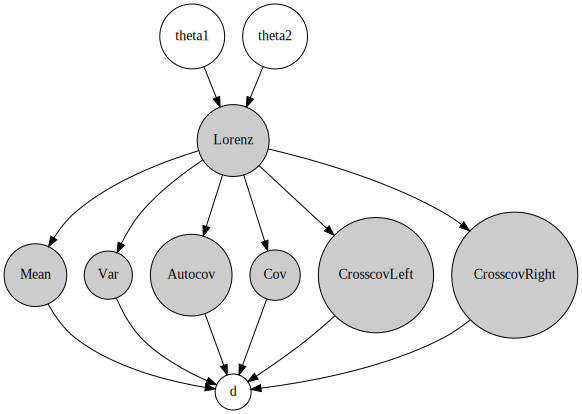

In [6]:
elfi.draw(m['d'])

In [7]:
rej = elfi.Rejection(m['d'], batch_size=1000, seed=seed)

In [8]:
%%time
res = rej.sample(1000)

CPU times: user 32 s, sys: 56 ms, total: 32.1 s
Wall time: 32.1 s


In [9]:
res.samples['theta1'].mean()

1.7029524436469754

In [10]:
res.summary()

Method: Rejection
Number of samples: 1000
Number of simulations: 100000
Threshold: 1.06
Sample means: theta1: 1.7, theta2: 0.396


In [11]:
# %time result2 = rej.sample(N, threshold=0.2)

# print(result2)  # the Sample object's __str__ contains the output from summary()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f720ccd9438>,
      dtype=object)

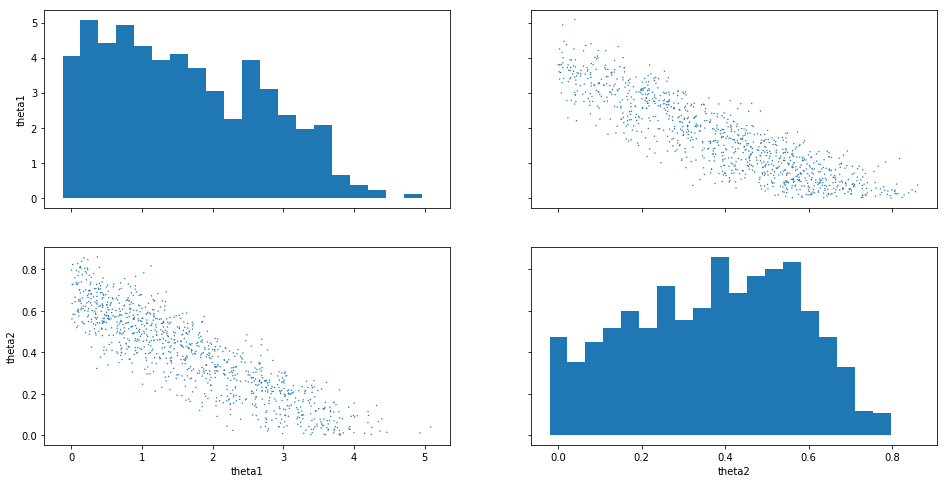

In [12]:
res.plot_pairs()

# References

- [1] Dutta R, Corander J, Kaski S, Gutmann MU. Likelihood-free inference by ratio estimation. arXiv preprint arXiv:1611.10242. 2016 Nov.